In [ ]:
import sys
import os
import numpy as np
import cv2
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.legend_handler import HandlerPatch
from tensorflow.keras import backend as K
import tensorflow as tf
from keras.initializers import he_uniform

# Import custom model function
from models.unet import unet_model
# Import custom functions
from demoModel import extractImageFromFits, stackImages, extrackStarPredictions, showPredictionOverlay, showPredictionComparison

2024-12-02 01:59:39.369731: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-02 01:59:39.997791: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [12]:
image_path = 'finalDemo/image.png'

# Load the image
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

print(image.shape)

# Resize the image to 512x512 if necessary
image = cv2.resize(image, (512, 512))

print(image.shape)

# Convert the image to a numpy array
np.expand_dims(image, axis=0)

print(image.shape)

# Normalize the image
image = image / 255.0

print(image.min(), image.max())




(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
0.0 1.0


In [13]:

image_input = np.array(image)
display(image_input)


array([[[0.18039216, 0.18039216, 0.18039216],
        [0.14117647, 0.14117647, 0.14117647],
        [0.17254902, 0.17254902, 0.17254902],
        ...,
        [0.15686275, 0.15686275, 0.15686275],
        [0.20392157, 0.20392157, 0.20392157],
        [0.14117647, 0.14117647, 0.14117647]],

       [[0.1372549 , 0.1372549 , 0.1372549 ],
        [0.15294118, 0.15294118, 0.15294118],
        [0.1372549 , 0.1372549 , 0.1372549 ],
        ...,
        [0.13333333, 0.13333333, 0.13333333],
        [0.14901961, 0.14901961, 0.14901961],
        [0.13333333, 0.13333333, 0.13333333]],

       [[0.12156863, 0.12156863, 0.12156863],
        [0.15294118, 0.15294118, 0.15294118],
        [0.12156863, 0.12156863, 0.12156863],
        ...,
        [0.16470588, 0.16470588, 0.16470588],
        [0.13333333, 0.13333333, 0.13333333],
        [0.14901961, 0.14901961, 0.14901961]],

       ...,

       [[0.1372549 , 0.1372549 , 0.1372549 ],
        [0.15294118, 0.15294118, 0.15294118],
        [0.14901961, 0

In [14]:
# Load the trained model weights
model_weights = "finalDemo/FINAL_2024_11_29-0023_24_unet_model_chris_model_weights.h5"

In [15]:
# Define hyperparameters
hyperparameters = {
    'input_shape': (512, 512, 3),
    'filters': [64, 128, 256, 512, 1024],
    'kernel_size': (3, 3),
    'activation': 'relu',
    'padding': 'same',
    'initializer': he_uniform
}

# Create and compile the model using hyperparameters
model = unet_model(
    input_shape=hyperparameters['input_shape'],
    filters=hyperparameters['filters'],
    kernel_size=hyperparameters['kernel_size'],
    activation=hyperparameters['activation'],
    padding=hyperparameters['padding'],
    initializer=hyperparameters['initializer']
)

# Load the saved model weights
model.load_weights(model_weights)

2024-12-02 01:59:41.531280: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-12-02 01:59:41.663864: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-12-02 01:59:41.663941: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-12-02 01:59:41.675770: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-12-02 01:59:41.675865: I tensorflow/compile

In [19]:
pred_star_data, prediction_mask = extrackStarPredictions(model.predict(np.expand_dims(image, axis=0))[0], threshold=0.5)

1/1 [==============================] - 0s 23ms/step


In [23]:
print("Number of stars detected:", len(pred_star_data))
print(prediction_mask.min(), prediction_mask.max())


Number of stars detected: 262104
0 1


1/1 [==============================] - 0s 23ms/step


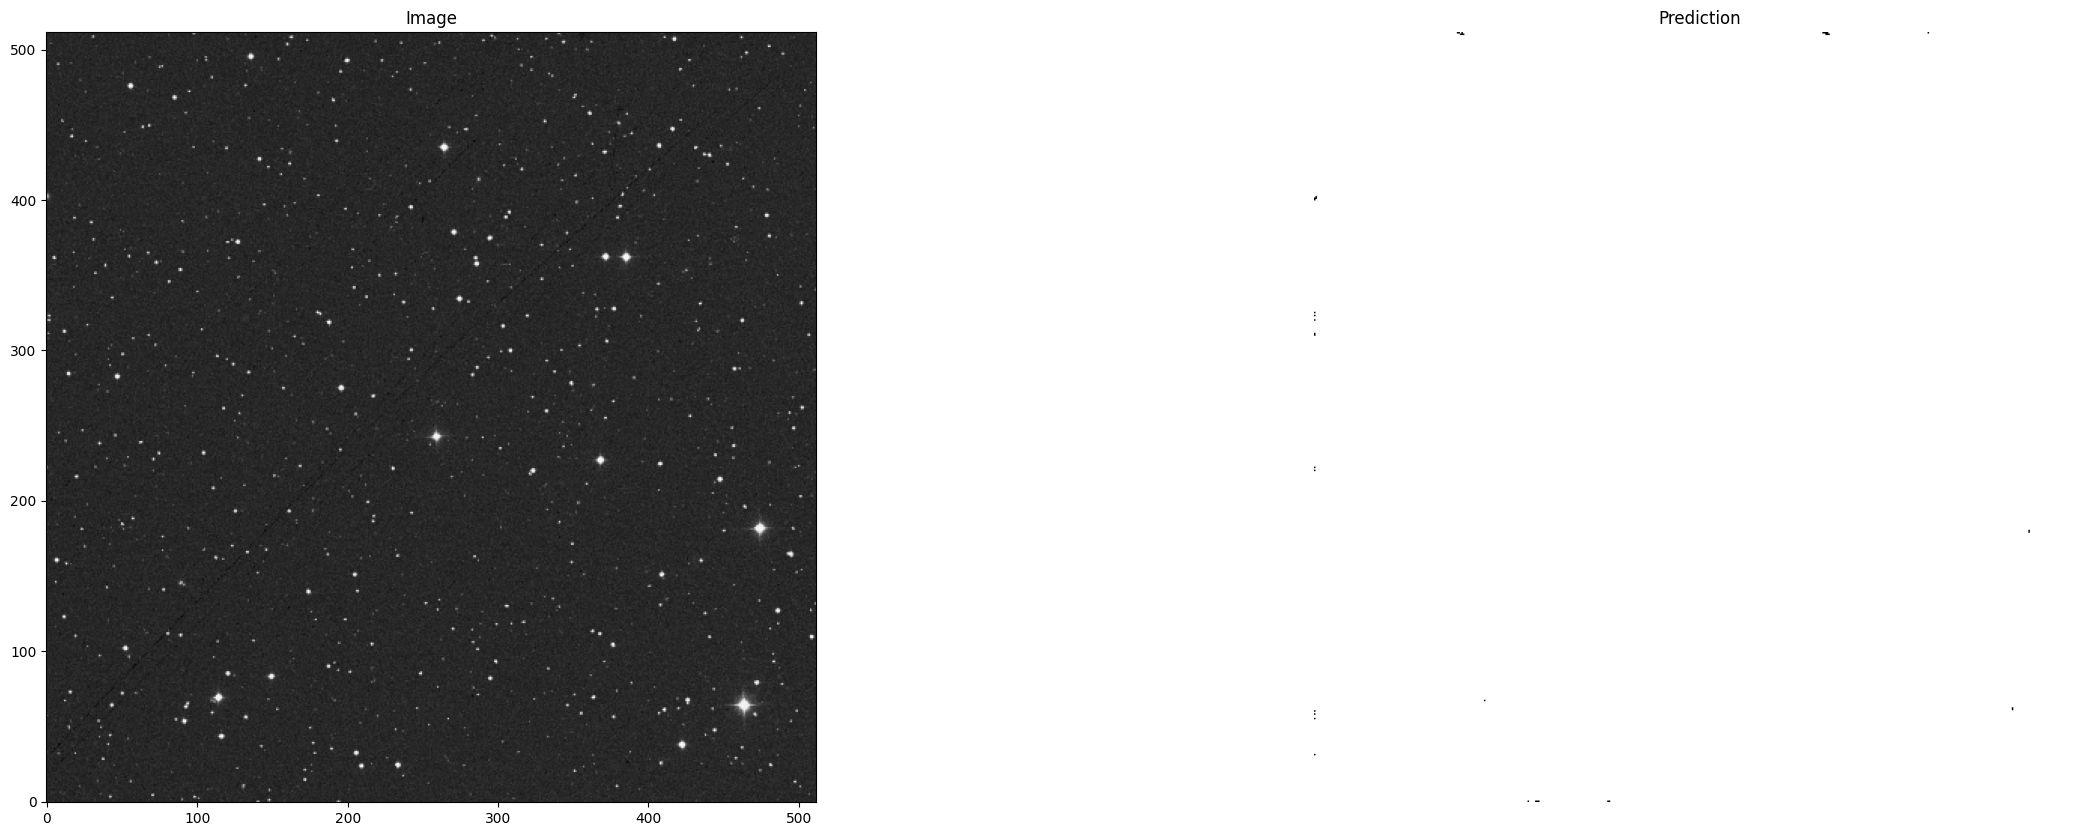

In [25]:
showPredictionComparison(image, image, model, threshold=0.5)

1/1 [==============================] - 0s 35ms/step
262104


ValueError: too many values to unpack (expected 2)

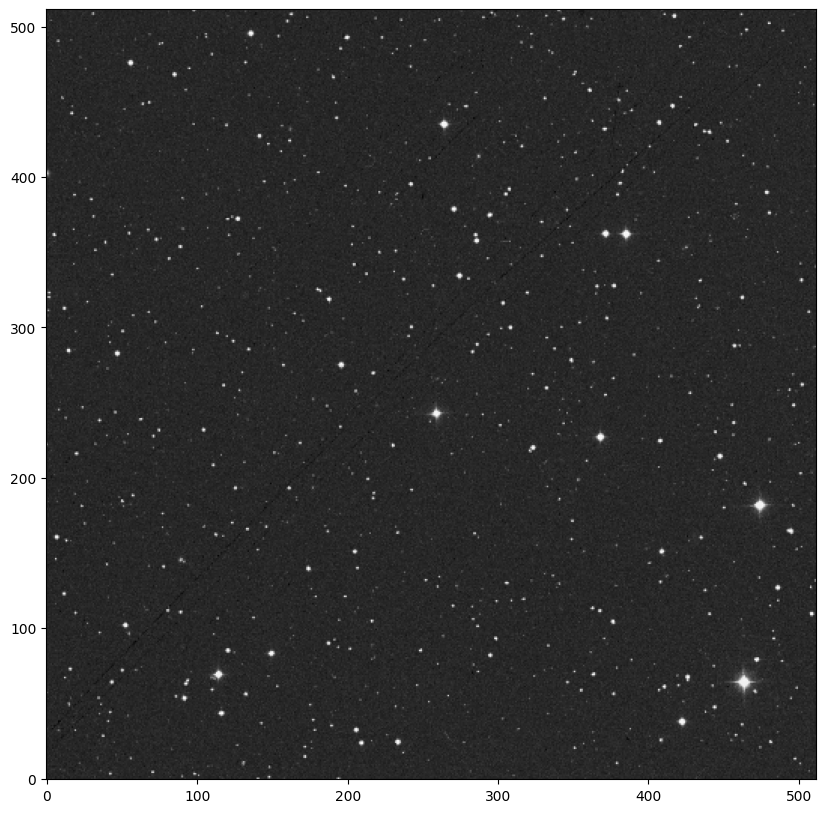

In [24]:
showPredictionOverlay(image, image, model, threshold=0.5)